# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

## Setup

In [66]:
# Setup
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

In [67]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [68]:
# Transform 'Question' table into dataframe
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [69]:
# Transform 'Answer' table into dataframe
df = pd.read_sql_query("SELECT * FROM Answer WHERE NOT SurveyID=2014", con)

In [70]:
# Change 'SurveyID' column into 'Year'
df.rename(columns={'SurveyID': 'Year'}, inplace = True)

## Question catalogue

In [71]:
# Print all questions with id
display(questions)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [72]:
def get_valid_answers(question_id):
    return df[(df['QuestionID'] == question_id) & (df['AnswerText'] != -1)]

In [73]:
# Q1: "What is your age?"
q1 = get_valid_answers(1)

In [74]:
# Q2: "What is your gender?"
q2 = get_valid_answers(2)

In [75]:
# Q3: "What country do you live in?"
q3 = get_valid_answers(3)

In [76]:
# Q5: "Are you self-employed?"
q5 = get_valid_answers(5)

In [77]:
# Q13: "Is your primary role within your company related to tech/IT?"
q13 = get_valid_answers(13)

In [78]:
# Q33: "Do you currently have a mental health disorder?"
q33 = get_valid_answers(33)

## Descriptive statistics

### Q1: Age distribution

### Q2: Gender distribution

#### Gender setup

In [79]:
# Change "AnswerText" to "Gender"
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [80]:
# Capitalize all entries
q2.Gender = q2.Gender.str.capitalize()
q2.head()

,Gender,Year,UserID,QuestionID
1433,Male,2016,1261,2
1434,Male,2016,1262,2
1435,Male,2016,1263,2
1436,Male,2016,1264,2
1437,Female,2016,1265,2


In [81]:
# Change non-"Male" and non-"Female" answer to "Other"
q2['Gender'] = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female')), 'Other', q2.Gender)


#### Gender analysis

In [82]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name="Count")
print(q2_by_year)

   Year  Count
0  2016   1433
1  2017    756
2  2018    417
3  2019    352


In [83]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name="Count")
print(q2_by_gender)

   Gender  Count
0  Female    777
1    Male   2052
2   Other    129


In [84]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name="Count")
print(q2_by_gender_and_year)

    Gender  Year  Count
0   Female  2016    336
1   Female  2017    218
2   Female  2018    125
3   Female  2019     98
4     Male  2016   1057
5     Male  2017    502
6     Male  2018    266
7     Male  2019    227
8    Other  2016     40
9    Other  2017     36
10   Other  2018     26
11   Other  2019     27


In [90]:
# Calculate total percentage of genders and append to q2_by_gender
genders_total = q2_by_gender.Count.sum()

female_total_percentage = q2_by_gender.at[0, 'Count'] / genders_total * 100
male_total_percentage = q2_by_gender.at[1, 'Count'] / genders_total * 100
other_total_percentage = q2_by_gender.at[2, 'Count'] / genders_total * 100

genders_percentage = [female_total_percentage, male_total_percentage, other_total_percentage]

q2_by_gender['Percentage'] = genders_percentage

print(q2_by_gender)

   Gender  Count  Percentage
0  Female    777   26.267748
1    Male   2052   69.371197
2   Other    129    4.361055


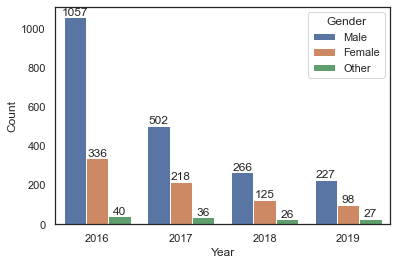

In [86]:
# q2_by_year_and_gender visualized
ax = sns.barplot(x = 'Year', y = 'Count', hue = 'Gender', data = q2_by_gender_and_year, hue_order=['Male', 'Female', 'Other'])
for container in ax.containers:
    ax.bar_label(container)

### Q3: Origin distribution

### Q5: Self-Employment

### Q13: Primary role in company

### Q33: Mental health disorder

## Hypotheses